In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path
sys.path.append("..")

from scripts.data_utils.loaders import load_data
from scripts.data_utils.utils import summarize_data
from scripts.data_utils.preprocessor import BrentOilDataPreprocessor
from scripts.data_utils.visualizer import BrentOilVisualizer
from scripts.data_utils.transformer import BrentOilDataTransformer


In [3]:
DATAPATH = Path('..', 'resources', 'data')
filepath = Path(DATAPATH, 'raw', 'BrentOilPrices.csv')
df = load_data(filepath)
summarize_data(df)

2025-02-21 05:52:22 - [✅ INFO] - Loading data from ..\resources\data\raw\BrentOilPrices.csv
2025-02-21 05:52:22 - [✅ INFO] - Successfully loaded data from ..\resources\data\raw\BrentOilPrices.csv
2025-02-21 05:52:22 - [✅ INFO] - 
--- Data Summary ---
2025-02-21 05:52:22 - [✅ INFO] -         count  unique        top freq       mean       std  min    25%    50%  \
Date     9011    9011  20-May-87    1        NaN       NaN  NaN    NaN    NaN   
Price  9011.0    5015        NaN  NaN  48.420782  32.86011  9.1  19.05  38.57   

         75%     max    dtype  
Date     NaN     NaN   object  
Price  70.09  143.95  float64  
2025-02-21 05:52:22 - [✅ INFO] - 
--- Data Info ---
2025-02-21 05:52:22 - [✅ INFO] - <class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory 

In [4]:
preprocessor = BrentOilDataPreprocessor(filepath)
# processed_data = preprocessor.preprocess()
# processed_data

In [5]:
preprocessor.load_data()
preprocessor.get_data()

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-10\notebooks\..\scripts\data_utils\preprocessor.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data = pd.read_csv(self.file_path, parse_dates=["Date"], dayfirst=True)


2025-02-21 05:52:25 - [✅ INFO] - Data loaded successfully. Shape: (9011, 1)


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25


In [6]:
preprocessor.parse_dates()
preprocessor.get_data()

2025-02-21 05:52:25 - [⚠️ WARNING] - Date column not found in data.
2025-02-21 05:52:25 - [✅ INFO] - Date parsing completed.


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25


In [7]:
preprocessor.clean_data()
preprocessor.get_data()

2025-02-21 05:52:26 - [✅ INFO] - Data cleaning completed.


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25


In [8]:
preprocessor.handle_missing_values()
preprocessor.get_data()

2025-02-21 05:52:26 - [✅ INFO] - Handled missing values.


c:\Users\Darkles\10academy\10Academy-Kifiya-Week-10\notebooks\..\scripts\data_utils\preprocessor.py:65: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data[column] = self.data[column].fillna(method='ffill')
c:\Users\Darkles\10academy\10Academy-Kifiya-Week-10\notebooks\..\scripts\data_utils\preprocessor.py:66: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data[column] = self.data[column].fillna(method='bfill')


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25


In [9]:
preprocessor.remove_outliers()
preprocessor.get_data()

2025-02-21 05:52:26 - [✅ INFO] - Outliers removed using zscore method.


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25


In [10]:
preprocessor.generate_temporal_features()
preprocessor.get_data()

2025-02-21 05:52:27 - [✅ INFO] - Time-based features added.


,Price,Year,Month,Day,Weekday,Quarter,Is_Weekend,Year_Month
Date,,,,,,,,
1987-05-20,18.63,1987,5,20,2,2,0,1987-05
1987-05-21,18.45,1987,5,21,3,2,0,1987-05
1987-05-22,18.55,1987,5,22,4,2,0,1987-05
1987-05-25,18.60,1987,5,25,0,2,0,1987-05
1987-05-26,18.63,1987,5,26,1,2,0,1987-05
...,...,...,...,...,...,...,...,...
2022-11-08,96.85,2022,11,8,1,4,0,2022-11
2022-11-09,93.05,2022,11,9,2,4,0,2022-11
2022-11-10,94.25,2022,11,10,3,4,0,2022-11


In [11]:
preprocessor.feature_engineering()
preprocessor.get_data()

2025-02-21 05:52:27 - [✅ INFO] - Feature engineering completed.


,Price,Year,Month,Day,Weekday,Quarter,Is_Weekend,Year_Month,7_day_MA,30_day_MA,Rolling_STD,Volatility
Date,,,,,,,,,,,,
1987-05-22,18.55,1987,5,22,4,2,0,1987-05,18.543333,18.543333,0.090185,0.010665
1987-05-25,18.60,1987,5,25,0,2,0,1987-05,18.557500,18.557500,0.078899,0.008037
1987-05-26,18.63,1987,5,26,1,2,0,1987-05,18.572000,18.572000,0.075631,0.006648
1987-05-27,18.60,1987,5,27,2,2,0,1987-05,18.576667,18.576667,0.068605,0.005803
1987-05-28,18.60,1987,5,28,3,2,0,1987-05,18.580000,18.580000,0.063246,0.005192
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-08,96.85,2022,11,8,1,4,0,2022-11,96.575714,93.685333,16.857916,0.019875
2022-11-09,93.05,2022,11,9,2,4,0,2022-11,96.540000,93.802000,16.819423,0.020100
2022-11-10,94.25,2022,11,10,3,4,0,2022-11,96.415714,93.963333,16.782916,0.020198


In [12]:
preprocessed_path = "../resources/data/processed/processed.csv"
preprocessor.save_data(preprocessed_path)

In [13]:
plot_dir = "../screenshots/plots"
eda = BrentOilVisualizer(preprocessed_path, plot_dir)
# eda.run_eda()
eda.load_data()

2025-02-21 05:52:28 - [✅ INFO] - Data loaded successfully. Shape: (9009, 13)


In [14]:
eda.summarize_data()

2025-02-21 05:52:29 - [✅ INFO] - 
Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9009 entries, 0 to 9008
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         9009 non-null   datetime64[ns]
 1   Price        9009 non-null   float64       
 2   Year         9009 non-null   int64         
 3   Month        9009 non-null   int64         
 4   Day          9009 non-null   int64         
 5   Weekday      9009 non-null   int64         
 6   Quarter      9009 non-null   int64         
 7   Is_Weekend   9009 non-null   int64         
 8   Year_Month   9009 non-null   object        
 9   7_day_MA     9009 non-null   float64       
 10  30_day_MA    9009 non-null   float64       
 11  Rolling_STD  9009 non-null   float64       
 12  Volatility   9009 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(6), object(1)
memory usage: 915.1+ KB
2025-02-21 05:52:29 - [✅

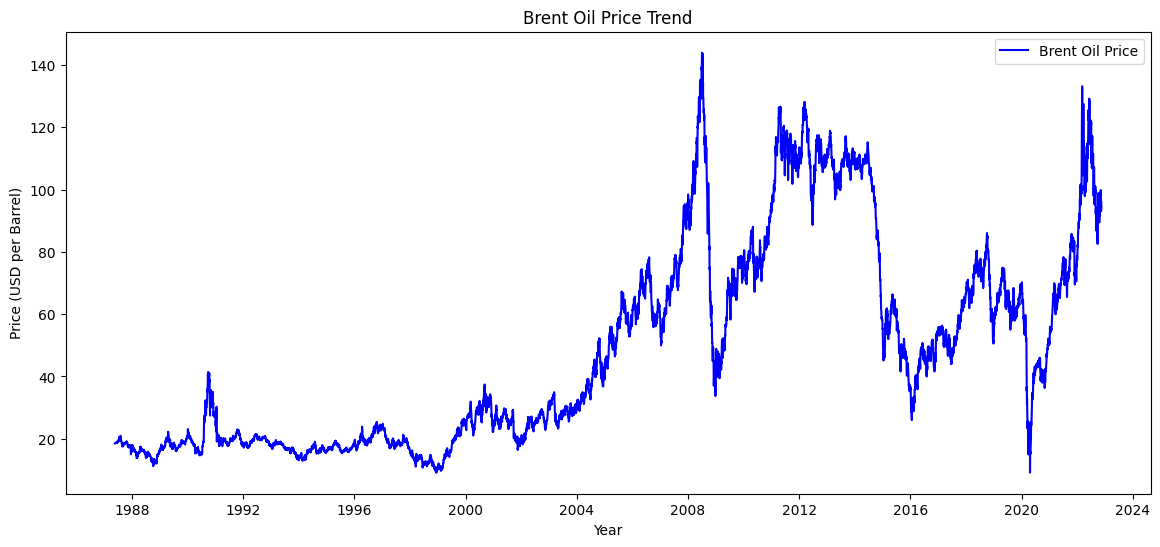

In [15]:
eda.plot_trend()

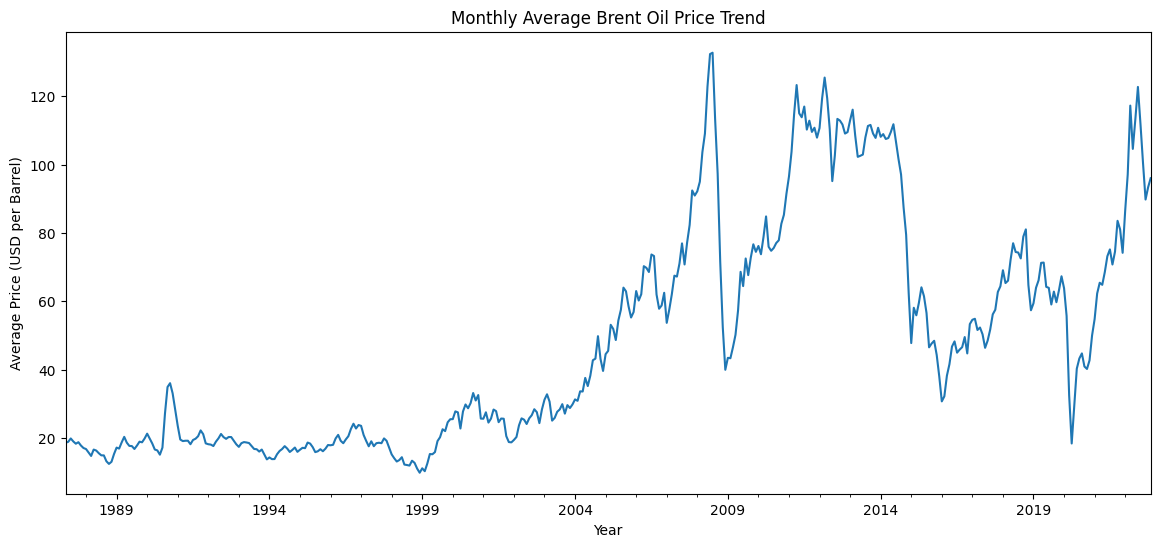

In [16]:
eda.plot_seasonality()

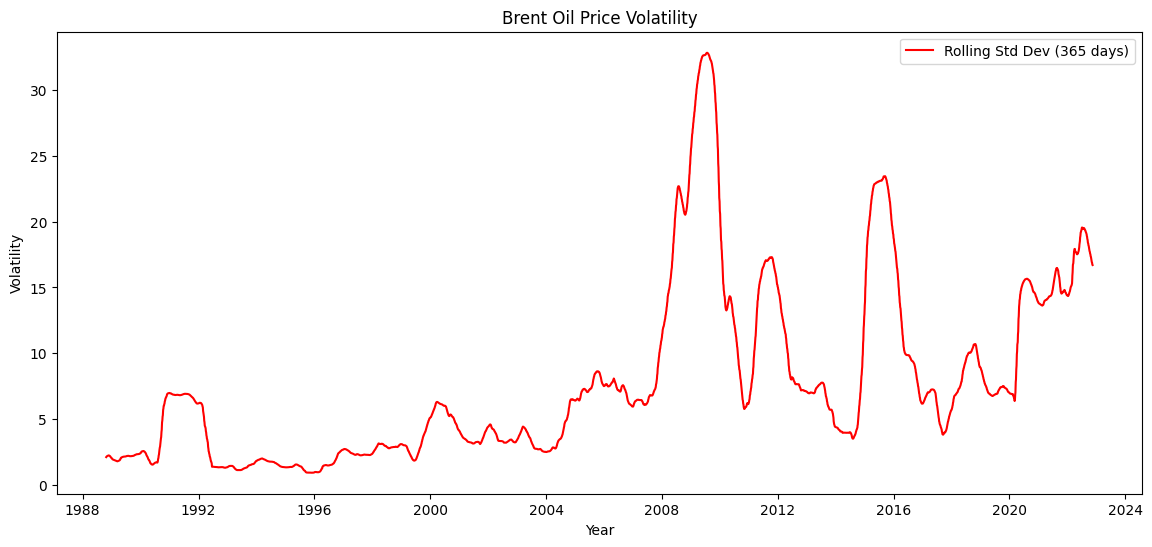

In [17]:
eda.plot_volatility()

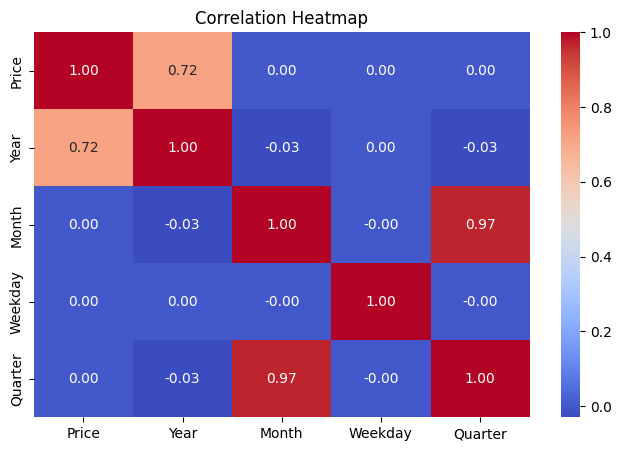

In [18]:
eda.plot_correlation()

The Augmented Dickey-Fuller (ADF) test results indicate that the Brent oil price time series is non-stationary (p-value = 0.2903, which is greater than 0.05).

Next Steps: Making the Time Series Stationary
Since non-stationary data violates the assumptions of many time series models (e.g., ARIMA), we need to transform it to achieve stationarity. Below are the key approaches:

1. Differencing (First Order)
This is the most common method—subtracting the previous value from the current value.
If the p-value drops below 0.05, the series is now stationary.

2. Log Transformation (If Variance is Non-Stationary)
If the time series has heteroscedasticity (increasing variance over time), applying a log transformation can help stabilize it.

3. Seasonal Differencing
If regular differencing doesn’t work, apply seasonal differencing (price[t] - price[t - seasonality]).
For monthly data: seasonality = 12, for daily data: seasonality = 365.

In [19]:
transformer = BrentOilDataTransformer(preprocessed_path)
transformer.load_data()
transformer.get_data()

2025-02-21 05:52:37 - [✅ INFO] - Data loaded successfully. Shape: (9009, 12)


c:\Users\Darkles\10academy\10Academy-Kifiya-Week-10\notebooks\..\scripts\data_utils\transformer.py:22: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  self.data = pd.read_csv(self.file_path, parse_dates=["Date"], dayfirst=True)


,Price,Year,Month,Day,Weekday,Quarter,Is_Weekend,Year_Month,7_day_MA,30_day_MA,Rolling_STD,Volatility
Date,,,,,,,,,,,,
1987-05-22,18.55,1987,5,22,4,2,0,1987-05,18.543333,18.543333,0.090185,0.010665
1987-05-25,18.60,1987,5,25,0,2,0,1987-05,18.557500,18.557500,0.078899,0.008037
1987-05-26,18.63,1987,5,26,1,2,0,1987-05,18.572000,18.572000,0.075631,0.006648
1987-05-27,18.60,1987,5,27,2,2,0,1987-05,18.576667,18.576667,0.068605,0.005803
1987-05-28,18.60,1987,5,28,3,2,0,1987-05,18.580000,18.580000,0.063246,0.005192
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-08,96.85,2022,11,8,1,4,0,2022-11,96.575714,93.685333,16.857916,0.019875
2022-11-09,93.05,2022,11,9,2,4,0,2022-11,96.540000,93.802000,16.819423,0.020100
2022-11-10,94.25,2022,11,10,3,4,0,2022-11,96.415714,93.963333,16.782916,0.020198


In [20]:
# Test for Stationarity
test = transformer.test_stationarity()

2025-02-21 05:52:39 - [✅ INFO] - 
Augmented Dickey-Fuller Test Results:


In [21]:
column = 'Price'
diff_order= 1
seasonality = 365

if not test['Stationary']:
    transformer.apply_transformations(column, diff_order, seasonality)
transformer.test_stationarity(f'{column}_diff_{diff_order}')

2025-02-21 05:52:45 - [✅ INFO] - 
Augmented Dickey-Fuller Test Results:
2025-02-21 05:52:45 - [✅ INFO] - Applied transformations pipeline (differencing, log, seasonal differencing).
2025-02-21 05:52:47 - [✅ INFO] - 
Augmented Dickey-Fuller Test Results:


{'ADF Statistic': -15.527736817971872,
 'p-value': 2.2409441166284744e-28,
 'Stationary': True}

In [22]:
transformer.get_data()

,Price,Year,Month,Day,Weekday,Quarter,Is_Weekend,Year_Month,7_day_MA,30_day_MA,Rolling_STD,Volatility,Price_diff_1
Date,,,,,,,,,,,,,
1987-05-25,18.60,1987,5,25,0,2,0,1987-05,18.557500,18.557500,0.078899,0.008037,0.05
1987-05-26,18.63,1987,5,26,1,2,0,1987-05,18.572000,18.572000,0.075631,0.006648,0.03
1987-05-27,18.60,1987,5,27,2,2,0,1987-05,18.576667,18.576667,0.068605,0.005803,-0.03
1987-05-28,18.60,1987,5,28,3,2,0,1987-05,18.580000,18.580000,0.063246,0.005192,0.00
1987-05-29,18.58,1987,5,29,4,2,0,1987-05,18.572857,18.580000,0.058554,0.004750,-0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-08,96.85,2022,11,8,1,4,0,2022-11,96.575714,93.685333,16.857916,0.019875,-3.02
2022-11-09,93.05,2022,11,9,2,4,0,2022-11,96.540000,93.802000,16.819423,0.020100,-3.80
2022-11-10,94.25,2022,11,10,3,4,0,2022-11,96.415714,93.963333,16.782916,0.020198,1.20


In [23]:
transformed_path = "../resources/data/processed/transformed.csv"
transformer.save_data(transformed_path)